<h3> Project Proposal Group 2</h3>
<h4> Gan Rui Yi, Chin Zhen Yu, Shum Wen Ping, Jiayi, Raiffanah Binte Razali<h4>

<h2><u> Analysis on the Birth Rate of Singapore </u></h2>

<h3> Problem Statement and Objectives</h3>

<p> As most of us noticed the size of our respective household has decreased significantly across generations, we find it interesting and relevant to explore this area. The issue on low birth rate in Singapore has persisted for many years. In 2019, the country's total fertility rate dipped to an abysmal of 1.14, putting Singapore at-risk of under-population. Our report aims to examine the degree of significance of various factors such as increased in education level, cost of living, work-life balance as well as child mortality rate. </p>


<h3> Datasets Used </h3>

<p><b>1. Birth rate:</b> https://data.gov.sg/dataset/births-and-fertility-annual <br>
<b>2. Education Level:</b> https://data.gov.sg/dataset/intake-enrolment-and-graduates-by-institutions<br>
<b>3. Cost of living:</b> https://data.gov.sg/dataset/consumer-price-index-cpi-for-households-in-different-income-groups-base-year-2014-100-half-yearly <br>
Taking into consideration: Childcare, Education, Health spending, Housing, Income<br>
    <b>4. Child mortality rate:</b> https://drive.google.com/file/d/1Kt36DeefcN7-PLC0EerTP2uXX6U8YsEE/view?usp=sharing<br>
<b>5. Work-life balance (average working hours per week):</b>
https://data.gov.sg/dataset/average-weekly-paid-hours-worked-per-employee-by-industry-and-type-of-employment-annual <br>
Taking into consideration: Working Hours a week, Workplace support, Paternity Leave, Disruption to Career Progression, Allowing remote work, Increasing responsibility (taking care of elderly at home)
</p>


<h3> Approach </h3>

1. Data Cleaning <br>
2. Exploratary Data Analysis <br>
3. Analysis of Factors - Visualization & Regression<br>


<h3> Data Cleaning </h3>

In this process, data on the different variables will be loaded and clean in preparation for analysis.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

<h4> 1. Fertility Rate </h4>

The fertility rate represents the average number of children a woman gives birth to. This dataset provide information of the fertility rate in Singapore between 1960 and 2018. In making sure fairness across the datasets of various factors, the dataset is filtered to a same time frame which is between 1993 and 2018. The total fertility rate is extracted from the raw dataset as it best describes our project objective.

In [2]:
#Fertility Rate
birth_rate_data = pd.read_csv('total-fertility-rate-and-reproduction-rate.csv')
print('\nBefore Data Cleaning')
print('-'*6)
display(birth_rate_data.head())

print('\nAfter Data Cleaning')
print('-'*6)

#Filtering level_1 = 'Total Fertility Rate' and dropping redundant column
total_fertility_rate = birth_rate_data[birth_rate_data['level_1']=='Total Fertility Rate']
total_fertility_rate = total_fertility_rate.drop(columns='level_1')

#Filtering year to between 1993 and 2018; Renaming column
total_fertility_rate = total_fertility_rate[total_fertility_rate['year']>=1993]
total_fertility_rate = total_fertility_rate[total_fertility_rate['year']<=2018]
total_fertility_rate = total_fertility_rate.rename(columns={'value': 'total_fertility_rate'})

total_fertility_rate = total_fertility_rate.reset_index(drop=True)
display(total_fertility_rate.tail())


Before Data Cleaning
------


,year,level_1,value
0,1960,Total Fertility Rate,5.76
1,1960,Gross Reproduction Rate,2.78
2,1960,Net Reproduction Rate,2.54
3,1961,Total Fertility Rate,5.41
4,1961,Gross Reproduction Rate,2.63



After Data Cleaning
------


,year,total_fertility_rate
21,2014,1.25
22,2015,1.24
23,2016,1.20
24,2017,1.16
25,2018,1.14


<h4> 2. Education Level </h4>

Education is one of the many factors that will be analysed as it is reflective of Singapore's education level. Singapore provides one of the best education to its young generation and we aim to understand its significance in contributing to the decreasing in birth rate. The dataset variables such as year, sex and number of enrollment in individual school. Data manipulation is applied to gather the total number of enrollment between 1993 and 2018.

In [3]:
education_level_data = pd.read_csv('intake-by-institutions.csv')
print('\nBefore Data Cleaning')
print('-'*6)
display(education_level_data.head())

print('\nAfter Data Cleaning')
print('-'*6)

university_intake = education_level_data[education_level_data['sex']=='MF'][['year', 'nus', 'ntu', 'smu', 'sit', 'sutd', 'suss']] 

#Replacing '-' with 0 
university_intake = university_intake.replace('-', 0) #since according to website, "'-' : Data is negligible or not significant"

#Setting data type for calculation process
university_intake['smu'] = university_intake['smu'].astype(int)
university_intake['sit'] = university_intake['sit'].astype(int)
university_intake['sutd'] = university_intake['sutd'].astype(int)
university_intake['suss'] = university_intake['suss'].astype(int)

#Calculating the total number of enrollment
university_intake['total_student_intake'] = university_intake['nus'].add(university_intake['ntu']).add(university_intake['smu']).add(university_intake['sit']).add(university_intake['sutd']).add(university_intake['suss'])

#Filtering years
university_intake = university_intake[university_intake['year']>=1993]
university_intake = university_intake[university_intake['year']<=2018]

#Removing unused columns
university_intake = university_intake.drop(columns = ['nus', 'ntu', 'smu', 'sit', 'sutd', 'suss'])

university_intake = university_intake.reset_index(drop=True)
display(university_intake.tail())


Before Data Cleaning
------


,year,sex,nus,ntu,smu,sit,sutd,suss,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,republic_polytechnic,lasalle_diploma,lasalle_degree,nafa_diploma,nafa_degree,ite
0,1982,MF,3937,582,-,-,-,-,888,2095,1614,-,-,-,-,-,-,-,8623
1,1982,F,2024,57,-,-,-,-,739,429,498,-,-,-,-,-,-,-,1336
2,1983,MF,4161,702,-,-,-,-,678,2597,2250,-,-,-,-,-,-,-,8881
3,1983,F,2478,63,-,-,-,-,502,550,892,-,-,-,-,-,-,-,1985
4,1984,MF,4441,690,-,-,-,-,595,2993,3405,-,-,-,-,-,-,-,6426



After Data Cleaning
------


,year,total_student_intake
21,2014,17870
22,2015,18126
23,2016,18552
24,2017,18668
25,2018,20041


<h4> 3. Cost of Living </h4>

The rising in cost of living has been reported to play a part in the declining birth rate and hence, we aim to analyse this factor and understand its degree of significance towards birth rate. The cost of living takes into consideration healthcare, housing, food and basic expenses.


In [4]:
cost_of_living_data = pd.read_csv('consumer-price-index-by-income-group-base-year-2014-100-all-items-half-yearly.csv')
print('Before Data Cleaning')
print('-'*6)
display(cost_of_living_data.head())

print('\nAfter Data Cleaning')
print('-'*6)

#Filtering dataset with the condition level_1 = 'All Items - Middle 60%'
consumer_price_index_middle_60_H1 = cost_of_living_data[cost_of_living_data['level_1']=='All Items - Middle 60%']

#Removing unused columns and Renaming columns
consumer_price_index_middle_60_H1 = consumer_price_index_middle_60_H1.drop(columns='level_1')
consumer_price_index_middle_60_H1 = consumer_price_index_middle_60_H1.reset_index()
consumer_price_index_middle_60_H1 = consumer_price_index_middle_60_H1.drop(columns='index')
consumer_price_index_middle_60_H1 = consumer_price_index_middle_60_H1.rename(columns = {'value':'CPI'})

#Cleaning and filtering half_year column
for row, data in consumer_price_index_middle_60_H1['half_year'].iteritems():
    if 'H2' in data:
        consumer_price_index_middle_60_H1 = consumer_price_index_middle_60_H1.drop(index=row)
def clean(year):
    year = re.sub('-H1','',year)
    return int(year)
consumer_price_index_middle_60_H1['half_year'] = consumer_price_index_middle_60_H1['half_year'].apply(clean)
consumer_price_index_middle_60_H1 = consumer_price_index_middle_60_H1[consumer_price_index_middle_60_H1['half_year']>=1993]
consumer_price_index_middle_60_H1 = consumer_price_index_middle_60_H1[consumer_price_index_middle_60_H1['half_year']<=2018]
consumer_price_index_middle_60_H1 = consumer_price_index_middle_60_H1.rename(columns={'half_year': 'year'})

consumer_price_index_middle_60_H1 = consumer_price_index_middle_60_H1.reset_index(drop=True)
display(consumer_price_index_middle_60_H1.tail())

Before Data Cleaning
------


,half_year,level_1,value
0,1993-H1,All Items - Lowest 20%,62.594
1,1993-H1,All Items - Middle 60%,67.942
2,1993-H1,All Items - Highest 20%,72.359
3,1993-H2,All Items - Lowest 20%,63.016
4,1993-H2,All Items - Middle 60%,68.445



After Data Cleaning
------


,year,CPI
21,2014,99.957
22,2015,99.787
23,2016,99.098
24,2017,99.683
25,2018,99.904


<h4> 4. Child Mortality Rate </h4>

Child mortality rate represents the death rate of children under the age of 5.

In [5]:
child_mortality_rate_data = pd.read_csv('singapore_mortality_rate.csv')
print('\nBefore Data Cleaning')
print('-'*6)
display(child_mortality_rate_data.head())

print('\nAfter Data Cleaning')
print('-'*6)

#Filtering year to common period
child_mortality_rate_data = child_mortality_rate_data[child_mortality_rate_data['year']>=1993]
child_mortality_rate_data = child_mortality_rate_data[child_mortality_rate_data['year']<=2018]

#Setting data type
child_mortality_rate_data['year'] = child_mortality_rate_data['year'].astype(int)

#Renaming columns
child_mortality_rate_data = child_mortality_rate_data.rename(columns = {'Mortality rate, under-5 (per 1,000 live births)':'mortality_rate'})
child_mortality_rate_data = child_mortality_rate_data[['year','mortality_rate']]

child_mortality_rate_data = child_mortality_rate_data.reset_index(drop=True)
display(child_mortality_rate_data.tail())



Before Data Cleaning
------


,year,"Mortality rate, under-5 (per 1,000 live births)",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,1960.0,47.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961.0,43.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962.0,40.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964.0,36.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



After Data Cleaning
------


,year,mortality_rate
21,2014,2.7
22,2015,2.7
23,2016,2.7
24,2017,2.7
25,2018,2.6


<h4> 5. Work Life Balance </h4>

The total paid hours is taken into account to measure the work life balance of working individuals in Singapore. An imbalanced work-life could potentially be a contributor to the issue.

In [6]:
work_life_balance_data = pd.read_csv('average-weekly-paid-hours-worked-per-employee-by-type-of-employment-topline.csv')
print('Before Data Cleaning')
print('-'*6)
display(work_life_balance_data.head())

print('After Data Cleaning')
print('-'*6)

#Extracting data on nature of employment = 'Full Time'
total_paid_hours_full_time = work_life_balance_data[work_life_balance_data['nature_of_employment']=='full-time'][['year', 'total_paid_hours']]

#Filtering year to common period and setting data type for year
total_paid_hours_full_time = total_paid_hours_full_time[work_life_balance_data['year']>=1993]
total_paid_hours_full_time = total_paid_hours_full_time[work_life_balance_data['year']<=2018]
total_paid_hours_full_time['year'] = total_paid_hours_full_time['year'].astype(int)

total_paid_hours_full_time = total_paid_hours_full_time.reset_index(drop=True)
display(total_paid_hours_full_time.tail())

Before Data Cleaning
------


,year,nature_of_employment,total_paid_hours,standard_hours,overtime_paid_hours
0,1990,full-time,47.5,43.0,4.5
1,1990,part-time,23.5,23.0,0.5
2,1991,full-time,47.4,43.0,4.4
3,1991,part-time,23.3,22.7,0.5
4,1992,full-time,47.4,43.1,4.3


After Data Cleaning
------


<ipython-input-6-9e43014ab209>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_paid_hours_full_time = total_paid_hours_full_time[work_life_balance_data['year']>=1993]
<ipython-input-6-9e43014ab209>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_paid_hours_full_time = total_paid_hours_full_time[work_life_balance_data['year']<=2018]


,year,total_paid_hours
21,2014,46.9
22,2015,46.5
23,2016,46.4
24,2017,46.0
25,2018,45.8


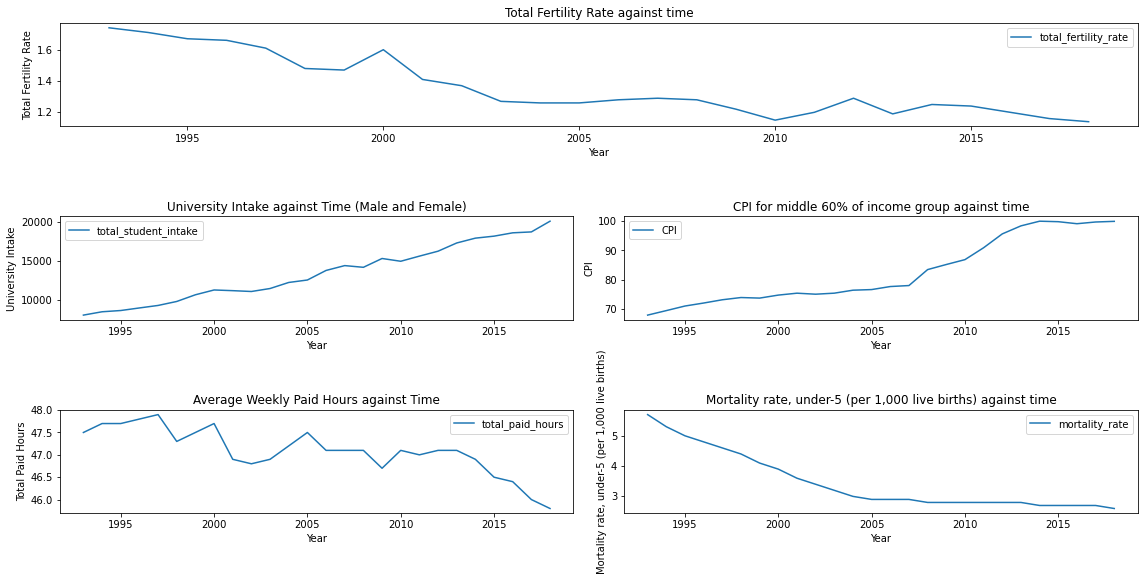

In [7]:
#Plotting Datasets
fig_dimensions=(16, 8)
fig = plt.figure(figsize = fig_dimensions)
ax1 = fig.add_subplot(3,1,1)
total_fertility_rate.plot(kind='line', x='year', y='total_fertility_rate', ax=ax1)
ax1.set_title('Total Fertility Rate against time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Fertility Rate')

ax2 = fig.add_subplot(3,2,3)
university_intake.plot(kind='line', x='year', y='total_student_intake', ax=ax2)
ax2.set_title('University Intake against Time (Male and Female)')
ax2.set_xlabel('Year')
ax2.set_ylabel('University Intake')

ax3 = fig.add_subplot(3,2,4)
consumer_price_index_middle_60_H1.plot(kind='line', x='year', y='CPI', ax=ax3)
ax3.set_title('CPI for middle 60% of income group against time')
ax3.set_xlabel('Year')
ax3.set_ylabel('CPI')

ax4 = fig.add_subplot(3,2,5)
total_paid_hours_full_time.plot(kind='line', x='year', y='total_paid_hours', ax=ax4)
ax4.set_title('Average Weekly Paid Hours against Time')
ax4.set_xlabel('Year')
ax4.set_ylabel('Total Paid Hours')

ax5 = fig.add_subplot(3,2,6)
child_mortality_rate_data.plot(kind='line', x='year', y='mortality_rate', ax=ax5)
ax5.set_title('Mortality rate, under-5 (per 1,000 live births) against time')
ax5.set_xlabel('Year')
ax5.set_ylabel('Mortality rate, under-5 (per 1,000 live births)')

plt.tight_layout()
plt.show()

<h3> Data Visualisation and Exploratory Data Analysis (EDA) </h3>



In [8]:
# conducting of Correlation visualization between all the chosen factors
import numpy as np
all_factors_df = pd.concat([total_fertility_rate,university_intake,consumer_price_index_middle_60_H1,total_paid_hours_full_time,
                            child_mortality_rate_data],axis=1).drop('year',axis=1)
all_factors_df['year'] = total_fertility_rate['year']

all_factors_df

,total_fertility_rate,total_student_intake,CPI,total_paid_hours,mortality_rate,year
0,1.74,8013,67.942,47.5,5.7,1993
1,1.71,8440,69.475,47.7,5.3,1994
2,1.67,8601,71.038,47.7,5.0,1995
3,1.66,8929,72.057,47.8,4.8,1996
4,1.61,9250,73.170,47.9,4.6,1997
5,1.48,9760,73.932,47.3,4.4,1998
6,1.47,10617,73.741,47.5,4.1,1999
7,1.60,11232,74.762,47.7,3.9,2000
8,1.41,11144,75.413,46.9,3.6,2001
9,1.37,11037,75.069,46.8,3.4,2002


<h4> Descriptive Statistical Analysis </h4>

In [9]:
all_factors_df.describe()

,total_fertility_rate,total_student_intake,CPI,total_paid_hours,mortality_rate,year
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1.361538,13377.346154,82.677962,47.088462,3.457692,2005.500000
std,0.190949,3642.934476,11.291088,0.524082,0.943683,7.648529
min,1.140000,8013.000000,67.942000,45.800000,2.600000,1993.000000
25%,1.225000,10722.000000,74.139500,46.900000,2.800000,1999.250000
50%,1.280000,13120.500000,77.163000,47.100000,2.900000,2005.500000
75%,1.477500,16040.750000,94.448000,47.500000,4.050000,2011.750000
max,1.740000,20041.000000,99.957000,47.900000,5.700000,2018.000000


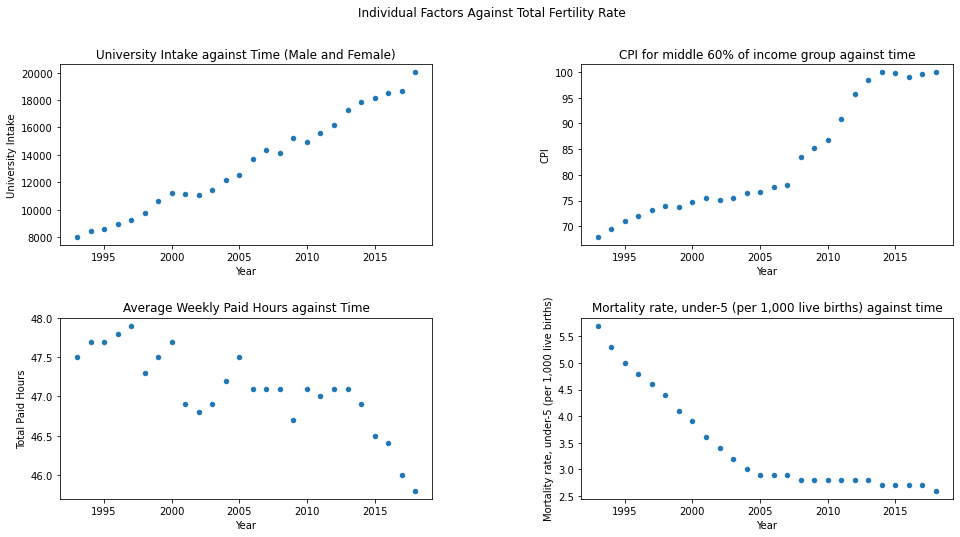

In [10]:
#Correlation Plots
fig_dimensions=(16, 8)
fig = plt.figure(figsize = fig_dimensions)
fig.suptitle('Individual Factors Against Total Fertility Rate')
plt.subplots_adjust(hspace=0.4, wspace=0.4)

ax2 = fig.add_subplot(2,2,1)
all_factors_df.plot(kind='scatter', x='year', y='total_student_intake', ax=ax2)
ax2.set_title('University Intake against Time (Male and Female)')
ax2.set_xlabel('Year')
ax2.set_ylabel('University Intake')

ax3 = fig.add_subplot(2,2,2)
all_factors_df.plot(kind='scatter', x='year', y='CPI', ax=ax3)
ax3.set_title('CPI for middle 60% of income group against time')
ax3.set_xlabel('Year')
ax3.set_ylabel('CPI')

ax4 = fig.add_subplot(2,2,3)
all_factors_df.plot(kind='scatter', x='year', y='total_paid_hours', ax=ax4)
ax4.set_title('Average Weekly Paid Hours against Time')
ax4.set_xlabel('Year')
ax4.set_ylabel('Total Paid Hours')

ax5 = fig.add_subplot(2,2,4)
all_factors_df.plot(kind='scatter', x='year', y='mortality_rate', ax=ax5)
ax5.set_title('Mortality rate, under-5 (per 1,000 live births) against time')
ax5.set_xlabel('Year')
ax5.set_ylabel('Mortality rate, under-5 (per 1,000 live births)')

plt.show()

These charts assist in the visualisation of correltation between the fertility rate and the individual factors. Based on this charts, we can observe that the points in mortality rate exhibits a positive correlation while the other charts seems to imply an indefinite relation. Hence, a high-level correlation analysis will be performed to have a greater understanding in the relationship between factors.

<h4> Correlation Analysis </h4>

Correlation analysis was executed to understand the direct relationship between fertility rate and the chosen factor.

In [11]:
all_factors_df.drop('year',axis=1).corr()

,total_fertility_rate,total_student_intake,CPI,total_paid_hours,mortality_rate
total_fertility_rate,1.000000,-0.861693,-0.762693,0.763228,0.965550
total_student_intake,-0.861693,1.000000,0.962543,-0.822464,-0.860300
CPI,-0.762693,0.962543,1.000000,-0.756454,-0.752118
total_paid_hours,0.763228,-0.822464,-0.756454,1.000000,0.701810
mortality_rate,0.965550,-0.860300,-0.752118,0.701810,1.000000


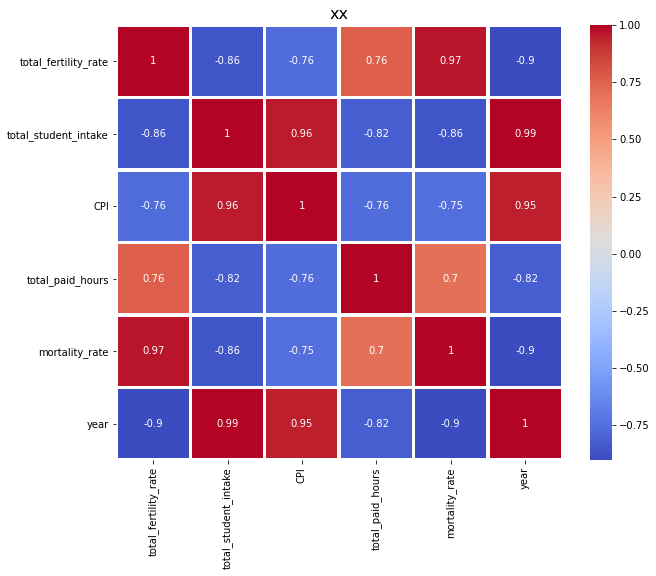

In [12]:
plt.figure(figsize=(10,8)) 
plt.title('xx', fontsize = 16)
p=sns.heatmap(all_factors_df.corr(), linewidth = 2.5, annot=True, cmap='coolwarm')

<u>Interpretation</u><br>

From the Pearson Correlation matrix, we can see that all factors are relatively closely related to each other from the high correlation values. When comparing the factors with total fertility rate, it appears that total mortaility rate is the most closely related factor followed by total student intake, total paid hours and CPI (cost of living). However, due to cause and effect, the correlation may be inaccurate in reflecting the causation of low birth rate in Singapore.

The result was surprising as we assume that education level was the main influence of declining in birth rate. With the increase in education level, Singaporeans are assumed to be more career-driven, causing them to prioritise career over building a family, leading to a decline in birth rate. However, based on the analysis conducted, mortality rate appears to be the biggest contributor.

<h3> Multivariate linear regression </h3>

The objective of this regression is to allow government to predict future birth rate by taking into consideration the factors used in the experiment. The estimates reflects the relationship between the independent variable and the dependent variable.

In [13]:
# #here we try to use a multivariate linear regression to see if we can predict birth rate

df_x = all_factors_df[['total_student_intake', 'CPI', 'total_paid_hours', 'mortality_rate']]
df_y = total_fertility_rate.drop('year',axis=1)


#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=21)

#Fit Model
from sklearn import datasets, linear_model
total_fertility_rate_lr = linear_model.LinearRegression()
total_fertility_rate_lr.fit(X_train, y_train)

print('Linear Equation:', total_fertility_rate_lr.coef_)
print('Intercept:', total_fertility_rate_lr.intercept_)

#Asses Performance of Model
from sklearn.metrics import r2_score 
fitted_value = total_fertility_rate_lr.predict(X_test)
print('R2 Score: ', end='')
print(r2_score(y_test, fitted_value))


Linear Equation: [[-8.73977707e-07 -5.33247624e-04  2.80950376e-02  1.77693315e-01]]
Intercept: [-0.52386137]
R2 Score: 0.892662343546561


After using a multivariate linear regression model to model the total fertility rate using the 4 factors earlier, this is the linear equation that we obtained that estimates future birth rate based on the trend for the last 25 years.

<h4>Y = -8.74e-07*X1 + -5.33e-04*X2 + 0.0281*X3 + 0.1777*X4 - 0.524 </h4>

Where X1 = total student intake, X2 = CPI, X3 = total paid hours, X4 = mortality rate

<u>Interpretation</u><br>

For every unit increase in total student intake, the birth rate decreases by 0.0000000874. <br>
For every unit increase in CPI, the birth rate decreases by 0.0000533. <br>
For every dollar increase in total paid hours, the birth rate increases by 0.0281. <br>
For every unit increase in mortality rate, the birth rate increases by 0.1777. <br>


This model returned a R-squared value of 0.89 when tested with the test set randomly obtained from the study period from 1993 to 2018. This seems to be a sufficiently good linear fit, but this does not show true causal effect of any factor on fertility, only association. 

<u>How could we have done the experiment differently?</u><br>

Factors chosen might be inaccurate or bias in finding the reasoning for the declining birth rate. There could be other factors that was not taken into consideration. For a single factor, there could be multiple dataset such as work life balance, other variables (i.e. Maternity Leave, Annual Leave, Working Hours, Unpaid Overtime Hours) was not taken into account which result in the inaccuracy in describing the said factor.

<h3> Deployment </h3>

<u>How could we contribute back to the government?</u><br>

Based on the matrix, we interpreted mortality rate to have a stronger correlation to birth rate. While it is unethical to increase mortality rate, the government could look into improving the scenarios of other factors. For tertiary intake, a possible suggestion that could be implemented is to organise campaigns for the stakeholders to change the mindset of young people. For CPI, the government can look into further developing the attractiveness of existing monetary incentives such as baby bonus so that young couple would be more encourage to build a family as it will lessen the monetary burden that comes in such situation.




As it is unethical to increase mortality rate to achieve an increase in birth rate, we would be looking at the second greatest factor which is total paid hours (work-life balance). Government can look into creating a flexible working environment (i.e. work from home) for individuals to achieve a work-life balance in their younger stage of life or implement a minimum working wage. 




# END

<h3>Comment (From instructor) </h3>

<p>
    <ol>
        <li> Problem Statement is concise and meaningful</li>
        <li> Prelimiary Data visulization has helped to understand the trend of different factors over time</li>
        <li> Since low birth rate is a complicated phenomenon, instead of only examine the biggest factor, you can extent to multiple top factors and perhaps from your result you can provide some suggestion to the government of how they can help to improve the BR</li>
        <li> You can also consider to build a regression model by using all the features you have mentioned above to predict the Birth rate</li>
        <li> Why do you need a hypothesis testing, you can provide more explanations when you can actually conduct it</li>
    </ol>
</p>